# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [7]:
#print(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}units={units}&APPID={weather_api_key}&q="

# set up list to hold reponse info
city_data = []

record = 1
set_count = 1

# Set up to print a log of each city
print(f"Beginning Data Retrieval")
print(f"------------------------")

# Loop through the list of cities and perform a request for data on each
# Set up Try Statement

for city in cities:
    
    city_url = query_url + city
    
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_record = city_weather["name"]
        city_humidity = city_weather["main"]["humidity"]
        city_cloudiness = city_weather["clouds"]["all"]
        city_wind_speed = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"] 

    # then append them to the data object.
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_cloudiness,
            "Wind Speed": city_wind_speed,
            "Country": city_country,
            "Date": city_date})
   
        if(record %50==1 and record >=50):
            set_count += 1
            record = 1
    
        print(f"Processing Record {record} of Set {set_count} | {city_record}")

        record += 1
        
        # wait seconds in loop to avoid over exceed rate limit of Weather API
        time.sleep(2.00)
    
    # If no record found, skip to next call
    except:
        print("City not found. Skipping...")
        pass


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | Qaanaaq
Processing Record 2 of Set 1 | Butaritari
Processing Record 3 of Set 1 | Ushuaia
Processing Record 4 of Set 1 | Yar-Sale
Processing Record 5 of Set 1 | Acajutla
Processing Record 6 of Set 1 | Dunedin
Processing Record 7 of Set 1 | Shimoda
Processing Record 8 of Set 1 | Chokurdakh
Processing Record 9 of Set 1 | Nome
Processing Record 10 of Set 1 | Saskylakh
Processing Record 11 of Set 1 | Ixtapa
Processing Record 12 of Set 1 | Islāmpur
Processing Record 13 of Set 1 | Marabu
Processing Record 14 of Set 1 | Khani
Processing Record 15 of Set 1 | Prince Rupert
City not found. Skipping...
Processing Record 16 of Set 1 | Bluff
Processing Record 17 of Set 1 | Bredasdorp
Processing Record 18 of Set 1 | Albany
Processing Record 19 of Set 1 | Dikson
Processing Record 20 of Set 1 | Mataura
Processing Record 21 of Set 1 | Hilo
Processing Record 22 of Set 1 | Atuona
Processing Record 23 of Set 1 | Jamestown
City

Processing Record 32 of Set 4 | Lorengau
Processing Record 33 of Set 4 | Tubmanburg
Processing Record 34 of Set 4 | Port Augusta
Processing Record 35 of Set 4 | Ostrovnoy
Processing Record 36 of Set 4 | Belmonte
Processing Record 37 of Set 4 | Belle Fourche
Processing Record 38 of Set 4 | Burnie
Processing Record 39 of Set 4 | Petropavlovsk-Kamchatskiy
Processing Record 40 of Set 4 | Aksarka
Processing Record 41 of Set 4 | Hoi An
Processing Record 42 of Set 4 | Lavrentiya
Processing Record 43 of Set 4 | Tiksi
Processing Record 44 of Set 4 | Douglas
Processing Record 45 of Set 4 | Mahébourg
Processing Record 46 of Set 4 | Hithadhoo
Processing Record 47 of Set 4 | Mount Gambier
Processing Record 48 of Set 4 | Hokitika
Processing Record 49 of Set 4 | Hailun
Processing Record 50 of Set 4 | Singaraja
City not found. Skipping...
Processing Record 1 of Set 5 | Agirish
Processing Record 2 of Set 5 | Henties Bay
Processing Record 3 of Set 5 | Elizabeth City
Processing Record 4 of Set 5 | Thanh 

Processing Record 20 of Set 8 | Kailua
Processing Record 21 of Set 8 | Santa Maria
Processing Record 22 of Set 8 | San Blas
Processing Record 23 of Set 8 | Perth
Processing Record 24 of Set 8 | Vila Velha
Processing Record 25 of Set 8 | Drumnadrochit
Processing Record 26 of Set 8 | Tomatlán
Processing Record 27 of Set 8 | Verāval
Processing Record 28 of Set 8 | Fairbanks
Processing Record 29 of Set 8 | Lappeenranta
Processing Record 30 of Set 8 | Sørland
Processing Record 31 of Set 8 | Itarema
Processing Record 32 of Set 8 | Los Llanos de Aridane
Processing Record 33 of Set 8 | San Rafael del Sur
Processing Record 34 of Set 8 | Vardø
Processing Record 35 of Set 8 | Golden
City not found. Skipping...
Processing Record 36 of Set 8 | Tāndā
Processing Record 37 of Set 8 | Kul'dur
Processing Record 38 of Set 8 | Katherine
Processing Record 39 of Set 8 | Kansanshi
Processing Record 40 of Set 8 | Ceuta
Processing Record 41 of Set 8 | Solnechnyy
Processing Record 42 of Set 8 | Manokwari
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [10]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,77.48,-69.36,41.81,65,4,2.04,GL,1595751081
1,butaritari,3.07,172.79,83.34,73,0,18.59,KI,1595751083
2,ushuaia,-54.80,-68.30,28.40,92,75,9.17,AR,1595751085
3,yar-sale,66.83,70.83,60.48,64,100,12.30,RU,1595751087
4,acajutla,13.59,-89.83,71.01,99,100,4.70,SV,1595751089


In [11]:
# Export the city data into a .csv
city_data_df.to_csv("city_data.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [142]:
# Read CSV file created by citypy so that I don't need to run it again
import csv
data = pd.read_csv("city_data.csv")

In [143]:
data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,77.48,-69.36,41.81,65,4,2.04,GL,1595751081
1,butaritari,3.07,172.79,83.34,73,0,18.59,KI,1595751083
2,ushuaia,-54.80,-68.30,28.40,92,75,9.17,AR,1595751085
3,yar-sale,66.83,70.83,60.48,64,100,12.30,RU,1595751087
4,acajutla,13.59,-89.83,71.01,99,100,4.70,SV,1595751089


In [144]:
# Check the indices of cities that have humidity over 100%.
over_humididy_df = data.loc[data["Humidity"] > 100, :]
over_humididy_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

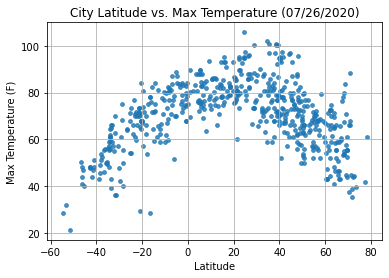

In [187]:
plt.scatter(data["Lat"],data["Max Temp"], marker="o", alpha=0.8, s=14)
plt.title("City Latitude vs. Max Temperature (07/26/2020)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("01 Temperature-Latitude.png")
plt.show()

In [146]:
# The above plot shows a relationship between latitude and maximum temperature collected at cities in the world. 
# The graph shows a binominal curve. Higher maximum temperatures were observed in cities with 0-20 degree of latitude.

## Latitude vs. Humidity Plot

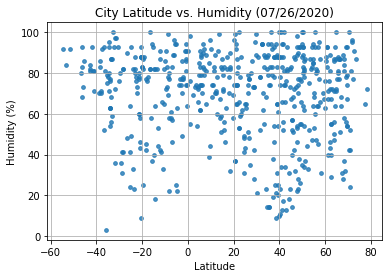

In [188]:
plt.scatter(data["Lat"],data["Humidity"], marker="o", alpha=0.8, s=14)
plt.title("City Latitude vs. Humidity (07/26/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("02 Humidity-Latitude.png")
plt.show()

In [148]:
# The above graph shows a relationship between latitude and humidity. 
# Based on the graph, there is no relationship between the two variables.

## Latitude vs. Cloudiness Plot

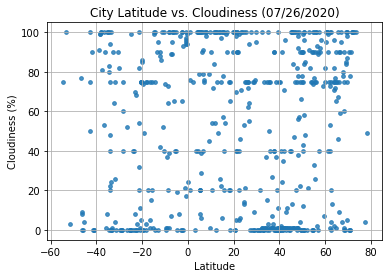

In [189]:
plt.scatter(data["Lat"], data["Cloudiness"], marker="o", alpha=0.8, s=14)
plt.title("City Latitude vs. Cloudiness (07/26/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("03 Cloudiness-Latitude.png")
plt.show()

In [150]:
# The above graph shows a relationship between latitude and cloudiness. 
# Based on the graph, there is no relationship between the two variables.

## Latitude vs. Wind Speed Plot

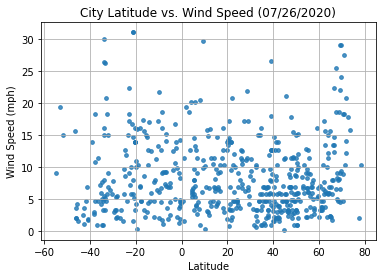

In [190]:
plt.scatter(data["Lat"],data["Wind Speed"], marker="o", alpha=0.8, s=14)
plt.title("City Latitude vs. Wind Speed (07/26/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("04 Wind Speed-Latitude.png")
plt.show()

In [152]:
# The above graph shows a relationship between latitude and wind speed. 
# Based on the graph, there is no relationship between the two variables.

## Linear Regression

In [153]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = data.loc[city_data_df["Lat"] >= 0, :]
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,77.48,-69.36,41.81,65,4,2.04,GL,1595751081
1,butaritari,3.07,172.79,83.34,73,0,18.59,KI,1595751083
3,yar-sale,66.83,70.83,60.48,64,100,12.30,RU,1595751087
4,acajutla,13.59,-89.83,71.01,99,100,4.70,SV,1595751089
6,shimoda,34.67,138.95,80.60,88,75,16.11,JP,1595751094


In [154]:
southern_hemisphere_df = data.loc[city_data_df["Lat"] < 0, :]
southern_hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,ushuaia,-54.80,-68.30,28.40,92,75,9.17,AR,1595751085
5,dunedin,-45.87,170.50,46.99,73,0,4.27,NZ,1595751091
15,bluff,-46.60,168.33,50.29,80,77,15.68,NZ,1595751113
16,bredasdorp,-34.53,20.04,55.40,93,80,4.70,ZA,1595751115
19,mataura,-46.19,168.86,40.80,93,8,2.01,NZ,1595751122
...,...,...,...,...,...,...,...,...,...
543,saint-joseph,-21.37,55.62,73.40,60,54,31.09,RE,1595752243
544,atocha,-20.93,-66.23,29.32,58,1,5.21,BO,1595752245
550,buala,-8.14,159.59,80.24,80,100,9.19,SB,1595752258
551,wangaratta,-36.37,146.33,55.99,81,90,4.70,AU,1595752260


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39


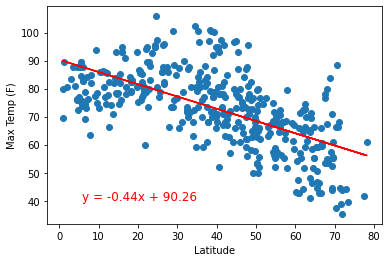

In [191]:
# OPTIONAL: Create a function to create Linear Regression plots

# Set up x and y variables: For Northern: "n", and For Southern "s"
x_n = northern_hemisphere_df["Lat"]
y_nt = northern_hemisphere_df["Max Temp"]
y_nh = northern_hemisphere_df["Humidity"]
y_nc = northern_hemisphere_df["Cloudiness"]
y_nw = northern_hemisphere_df["Wind Speed"]

x_s = southern_hemisphere_df["Lat"]
y_st = southern_hemisphere_df["Max Temp"]
y_sh = southern_hemisphere_df["Humidity"]
y_sc = southern_hemisphere_df["Cloudiness"]
y_sw = southern_hemisphere_df["Wind Speed"]

def regression_plot (x, y, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(min(x+5),min(y+5)),fontsize=12, color="red")
    print(f"The r-squared is: {round(rvalue**2,2)}")

# Then call this function
regression_plot(x_n, y_nt, 'Max Temp')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("05 Max Temp-Latitude-N-Hemisphere.png")
plt.show()

In [29]:
# The above graph shows a relationship between latitude and maximum temperature in Northern Hemisphere. 
# The r-squared value was 0.39, and there was a negative relationship between latitude and maximum temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.59


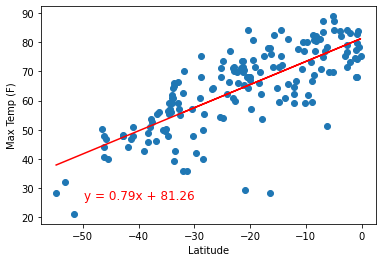

In [192]:
regression_plot(x_s, y_st, 'Max Temp')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("06 Max Temp-Latitude-S-Hemisphere.png")
plt.show()

In [163]:
# The above graph shows a relationship between latitude and maximum temperature in Southern Hemisphere. 
# The r-squared value was 0.59, and there was a positive relationship between latitude and maximum temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0


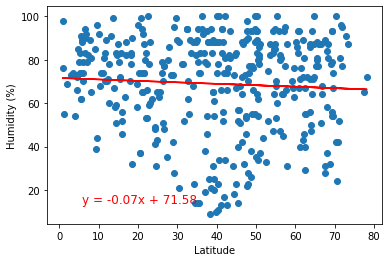

In [193]:
regression_plot(x_n, y_nh, 'Humidity')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("07 Humidity-Latitude-N-Hemisphere.png")
plt.show()

In [165]:
# The above graph shows a relationship between latitude and humidity in Northern Hemisphere. 
# The r-squared value was 0.0, and there was no relationship between latitude and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01


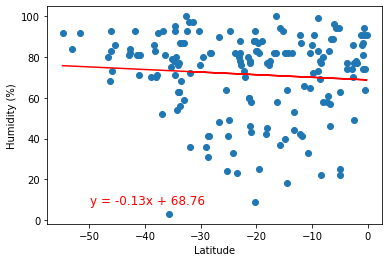

In [194]:
regression_plot(x_s, y_sh, 'Humidity')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("08 Humidity-Latitude-S-Hemisphere.png")
plt.show()

In [167]:
# The above graph shows a relationship between latitude and humidity in Southern Hemisphere. 
# The r-squared value was 0.01, and there was no relationship between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0


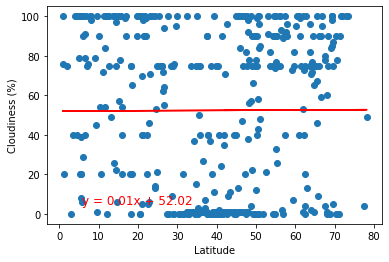

In [195]:
regression_plot(x_n, y_nc, 'Cloudiness')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("09 Cloudiness-Latitude-N-Hemisphere.png")
plt.show()

In [169]:
# The above graph shows a relationship between latitude and cloudiness in Northern Hemisphere. 
# The r-squared value was 0.0, and there was no relationship between latitude and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01


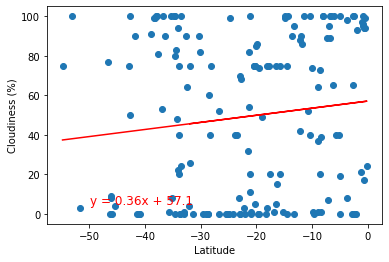

In [196]:
regression_plot(x_s, y_sc, 'Cloudiness')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("10 Cloudiness-Latitude-S-Hemisphere.png")
plt.show()

In [171]:
# The above graph shows a relationship between latitude and cloudiness in Southern Hemisphere. 
# The r-squared value was 0.01, and there was no relationship between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0


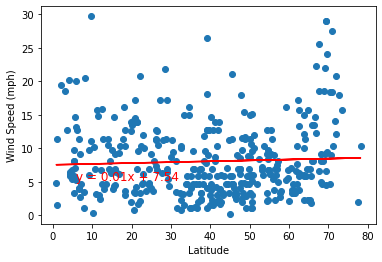

In [197]:
regression_plot(x_n, y_nw, 'Wind Speed')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("11 Wind Speed-Latitude-N-Hemisphere.png")
plt.show()

In [173]:
# The above graph shows a relationship between latitude and wind speed in Northern Hemisphere. 
# The r-squared value was 0.0, and there was no relationship between latitude and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0


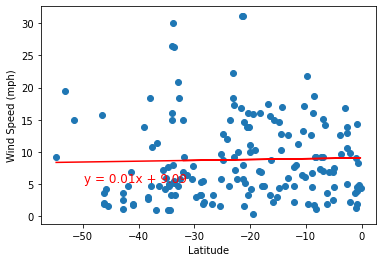

In [198]:
regression_plot(x_s, y_sw, 'Wind Speed')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("12 Wind Speed-Latitude-S-Hemisphere.png")
plt.show()

In [ ]:
# The above graph shows a relationship between latitude and wind speed in Southern Hemisphere. 
# The r-squared value was 0.0, and there was no relationship between latitude and wind speed.

In [ ]:
# A written description of three observable trends based on the data
#1: There was a strong correlation between maximum temperature and latitude. Low latitude regions had higher maximum temperature compared with high latitude regions.
#2: There were no correlations between latidude and humidity, cloudiness, and wind speed. These variables might be related with weather. Weather frequently changes anywhere in the world, either high or low latitude; therefore, there might not be a relationship between latitude and the other variables. 
#3: I obtained similar statistic results and patterns from the analyses with northern and southern hemisphere. There was a strong relationship between temperature and latitude, but not with the other variables including humidity, cloudiness, and wind speed.
